In [2]:
import cv2
import numpy as np

#numberPlateCascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
plat_detector =  cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")
video = cv2.VideoCapture('vid.mp4')

if(video.isOpened()==False):
    print('Error Reading Video')

while True:
    ret,frame = video.read()    
    gray_video = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    plate = plat_detector.detectMultiScale(gray_video,scaleFactor=1.2,minNeighbors=5,minSize=(25,25))

    for (x,y,w,h) in plate:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0),2)
        frame[y:y+h,x:x+w] = cv2.blur(frame[y:y+h,x:x+w],ksize=(10,10))
        cv2.putText(frame,text='License Plate',org=(x-3,y-3),fontFace=cv2.FONT_HERSHEY_COMPLEX,color=(0,0,255),thickness=1,fontScale=0.6)
        
         
    if ret == True:
        cv2.imshow('Video', frame)

        if cv2.waitKey(25) & 0xFF == ord("q"):
            break
    else:
        break

video.release()
cv2.destroyAllWindows()   

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [30]:
import os
import numpy as np
import pandas as pd
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from sklearn.metrics import f1_score

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers

from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

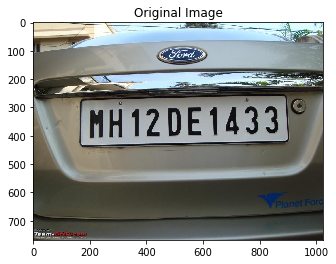

In [31]:
# Read the image file
image = cv2.imread('dd.jpeg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

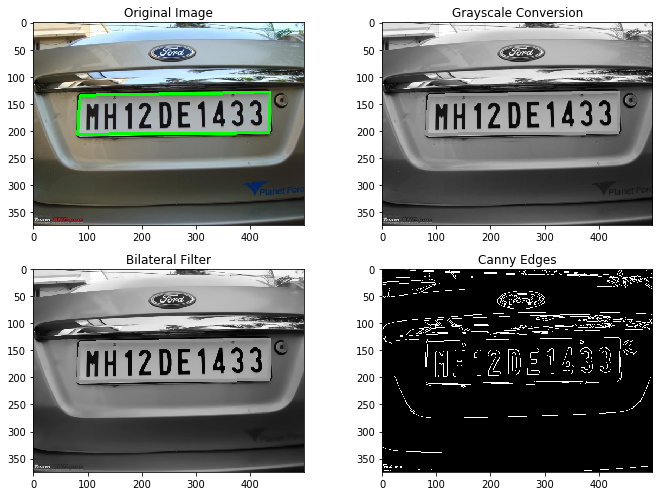

In [51]:
image = imutils.resize(image, width=500)
img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
global text2
text2="MH 12 DE 14 33"
# Display the original image
fig, ax = plt.subplots(2, 2, figsize=(10,7))
ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')

# RGB to Gray scale conversion
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ax[0,1].imshow(gray, cmap='gray')
ax[0,1].set_title('Grayscale Conversion')

# Noise removal with iterative bilateral filter(removes noise while preserving edges)
gray = cv2.bilateralFilter(gray, 11, 17, 17)
ax[1,0].imshow(gray, cmap='gray')
ax[1,0].set_title('Bilateral Filter')

# Find Edges of the grayscale image
edged = cv2.Canny(gray, 170, 200)
ax[1,1].imshow(edged, cmap='gray')
ax[1,1].set_title('Canny Edges')

fig.tight_layout()
plt.show()

# Find contours based on Edges
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = None #we currently have no Number plate contour

# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            break

if NumberPlateCnt is not None:
    # Drawing the selected contour on the original image
    cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
text="BG 224.NZ"    

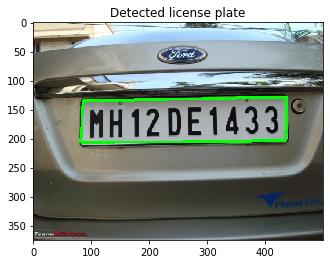

In [33]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Detected license plate")
plt.show()

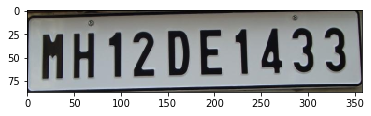

In [34]:
fig = plt.figure()
plt.imshow(ROI)

plt.show()

fig.savefig("dd1.jpg")


In [35]:
 
import pytesseract
pytesseract.pytesseract.tesseract_cmd ='C:/Program Files (x86)/Tesseract-OCR/tesseract.exe'
from PIL import Image
mg = Image.open("dd1.jpg")

result = pytesseract.image_to_string(mg)   


In [99]:
import pandas as pd

In [103]:
df=pd.read_csv("mydata.csv")
df

,name,lic-number,account-balance,mail
0,Nihar,HR.2342,700,mail
1,Kamal,AR-4234,7000,mail
2,Raman,DL-4234,400,mail
3,Rishi,AS-4234,1030,mail
4,Ankush Banik,MH 12 DE 14 33,11395,ankushbanik123@gmail.com


In [104]:

import smtplib, ssl

def sendmail():
    
    for i in range(0,1):
        x,y=df["name"][i],df["lic-number"][i]
        gmailaddress ="ankushbanik1234@gmail.com"
        gmailpassword = "you pass"
        mailto1 = mail

        msg = "Hello "+name+",\nYour licence number is "+lic+"\nYour Current Account balance is ="+str(newbal)+".\n.You have paid 55/-Rs for the Toll tax.\n!!!Visit Again.\n.\n\n\n"

        try:
            mailServer = smtplib.SMTP('smtp.gmail.com' , 587)
            # ...send emails
            mailServer.starttls()
            mailServer.login(gmailaddress , gmailpassword)
            mailServer.sendmail(gmailaddress, mailto1 , msg)

            print("\n check your mail")
            mailServer.quit()
        except:



            print("Thank You so much, See you again")

import time
for i in range(len(df["name"])):
        if (text2)==df["lic-number"][i]:
            print("Your Name is :"+df["name"][i])
            global name
            name=df["name"][i]
            global lic
            lic=df["lic-number"][i]
            time.sleep(2)
            print("Your car number is :"+df["lic-number"][i])
            time.sleep(2)
            print("Your balace  is :"+str(df["account-balance"][i]))
            time.sleep(2)
            print("Your Toll charges is 55/- for punjab to hariyana" )
            print("Proccessing your fee")
            time.sleep(3)
            global newbal
            global mail
            mail=df["mail"][i]
            print("sending fee receipt to your mail id.....")
            newbal=int(df["account-balance"][i])-55
            print("!!Your have been paid your toll fee successfully !!!")
            print("Your balace  is :"+str(newbal))
            time.sleep(3)
            x,y=df["name"][i],df["lic-number"][i]
         
            df.drop(i,inplace=True)
               
            b=pd.DataFrame([[x,y,newbal,mail]])
            b.columns=df.columns
            df=df.append(b)
            df.to_csv("mydata.csv",index=False)
            print("Thank You see you again!!")
            sendmail()  
            break




Your Name is :Ankush Banik
Your car number is :MH 12 DE 14 33
Your balace  is :11395
Your Toll charges is 55/- for punjab to hariyana
Proccessing your fee
sending fee receipt to your mail id.....
!!Your have been paid your toll fee successfully !!!
Your balace  is :11340
Thank You see you again!!

 check your mail
